# Imports #

## Libraries ##

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import itertools

## Data ##

In [2]:
customers_df = pd.read_csv('Ressources' + '/' + 'olist_customers_dataset.csv')
geolocalisation_df = pd.read_csv('Ressources' + '/' + 'olist_geolocation_dataset.csv')
items_df = pd.read_csv('Ressources' + '/' + 'olist_order_items_dataset.csv')
payments_df = pd.read_csv('Ressources' + '/' + 'olist_order_payments_dataset.csv')
reviews_df = pd.read_csv('Ressources' + '/' + 'olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('Ressources' + '/' + 'olist_orders_dataset.csv')
products_df = pd.read_csv('Ressources' + '/' + 'olist_products_dataset.csv')
sellers_df = pd.read_csv('Ressources' + '/' + 'olist_sellers_dataset.csv')
product_category_df = pd.read_csv('Ressources' + '/' + 'product_category_name_translation.csv')

# New Datasets #

## Global Dataset ##

### Creation ###

We will first merge all these datesets into one.

In [3]:
# Corresponding all orders to unique customers

data_df = pd.merge(customers_df, orders_df, how='inner', on='customer_id')
data_df.drop(columns=['customer_id'], inplace=True)

In [4]:
# Corresponding location to customers

data_df.rename(columns={'customer_zip_code_prefix':'zip_code'}, inplace=True)
geolocalisation_df.rename(columns={'geolocation_zip_code_prefix':'zip_code'}, inplace=True)
geolocalisation_df.drop_duplicates(subset='zip_code', inplace=True)
data_df = pd.merge(data_df, geolocalisation_df, how='inner', on='zip_code')
data_df.drop(columns=['geolocation_city', 'geolocation_state'], inplace=True)

In [5]:
# Orders with their corresponding date and items

data_df = pd.merge(data_df, items_df, how='inner', on='order_id')

In [6]:
# Corresponding orders with their payments

data_df = pd.merge(data_df, payments_df, how='inner', on='order_id')

In [7]:
# Corresponding orders with their reviews

data_df = pd.merge(data_df, reviews_df, how='inner', on='order_id')

In [8]:
# Corresponding product and their descriptions

data_df = pd.merge(data_df, products_df, how='inner', on='product_id')

In [9]:
# Corresponding sellers and their location

temp_df = geolocalisation_df
temp_df.rename(columns={'zip_code':'seller_zip_code_prefix', 
                        'geolocation_lat':'seller_lat',
                        'geolocation_lng':'seller_lng'}, 
               inplace=True)
temp_df.drop(columns=['geolocation_city', 'geolocation_state'], inplace=True)

sellers_df = pd.merge(sellers_df, temp_df, how='inner', on='seller_zip_code_prefix')
sellers_df.rename(columns={'seller_zip_code_prefix':'seller_zip_code'}, inplace=True)

data_df = pd.merge(data_df, sellers_df, how='inner', on='seller_id')

In [10]:
# Corresponding product's categories to their English names

data_df = pd.merge(data_df, product_category_df, how='inner', on='product_category_name')
data_df.drop(columns='product_category_name', inplace=True)

In [11]:
# Reindexing the columns order

data_df = data_df.reindex(columns=['customer_unique_id', 'customer_state', 'customer_city',
                                   'zip_code', 'geolocation_lat', 'geolocation_lng',
                                   'order_id', 'order_status', 'seller_id','seller_state',
                                   'seller_city', 'seller_zip_code', 'seller_lat', 'seller_lng',
                                   'price', 'freight_value', 'payment_value', 'payment_type',
                                   'payment_installments', 'payment_sequential', 'review_id', 
                                   'review_score', 'review_comment_title', 'review_comment_message', 
                                   'review_creation_date', 'review_answer_timestamp', 
                                   'order_purchase_timestamp', 'order_approved_at', 
                                   'order_delivered_carrier_date', 'order_delivered_customer_date', 
                                   'order_estimated_delivery_date', 'shipping_limit_date',
                                   'order_item_id', 'product_id', 'product_category_name_english',
                                   'product_name_lenght', 'product_description_lenght', 
                                   'product_photos_qty', 'product_weight_g', 'product_length_cm', 
                                   'product_height_cm', 'product_width_cm'])
# Droping unknown data

data_df.dropna(subset=['customer_unique_id'], inplace=True)
data_df.reset_index(drop=True, inplace=True)

In [12]:
data_df.to_csv('Ressources' + '/' + 'GlobalData.csv', index=False)

### Preparing the Data ###

<ipython-input-13-037601310f16>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(missing_df.index, rotation=45, horizontalalignment= 'right')


[Text(0, 0, 'customer_unique_id'),
 Text(1, 0, 'customer_state'),
 Text(2, 0, 'customer_city'),
 Text(3, 0, 'zip_code'),
 Text(4, 0, 'geolocation_lat'),
 Text(5, 0, 'geolocation_lng'),
 Text(6, 0, 'order_id'),
 Text(7, 0, 'order_status'),
 Text(8, 0, 'seller_id'),
 Text(9, 0, 'seller_state'),
 Text(10, 0, 'seller_city'),
 Text(11, 0, 'seller_zip_code'),
 Text(12, 0, 'seller_lat'),
 Text(13, 0, 'seller_lng'),
 Text(14, 0, 'price'),
 Text(15, 0, 'freight_value'),
 Text(16, 0, 'payment_value'),
 Text(17, 0, 'payment_type'),
 Text(18, 0, 'payment_installments'),
 Text(19, 0, 'payment_sequential'),
 Text(20, 0, 'review_id'),
 Text(21, 0, 'review_score'),
 Text(22, 0, 'review_comment_title'),
 Text(23, 0, 'review_comment_message'),
 Text(24, 0, 'review_creation_date'),
 Text(25, 0, 'review_answer_timestamp'),
 Text(26, 0, 'order_purchase_timestamp'),
 Text(27, 0, 'order_approved_at'),
 Text(28, 0, 'order_delivered_carrier_date'),
 Text(29, 0, 'order_delivered_customer_date'),
 Text(30, 0, 'o

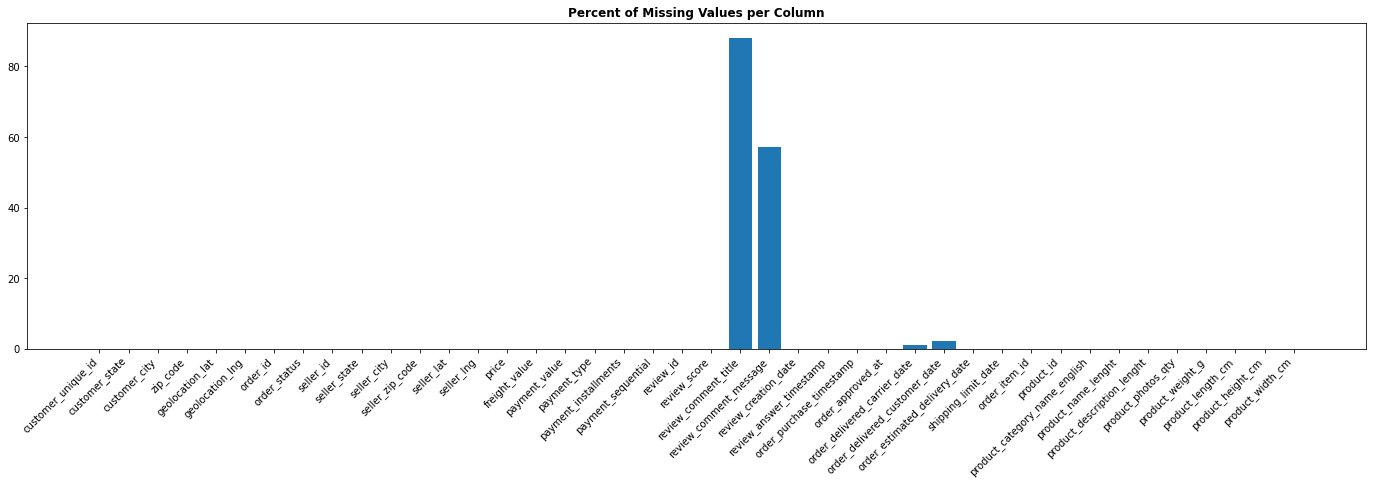

In [13]:
# Preparation pour le graphe
missing_df = data_df.isna().sum().to_frame()
missing_df = missing_df/len(data_df)*100
missing_df.columns = ['Count']

# Graphe 
fig, ax = plt.subplots(1, 1, figsize=(24,6))

# Missing Data
ax.bar(missing_df.index, missing_df['Count'])
ax.set_title('Percent of Missing Values per Column', fontsize=12, fontweight='bold')
ax.set_xticklabels(missing_df.index, rotation=45, horizontalalignment= 'right')

In [14]:
data_df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

In [15]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116007 entries, 0 to 116006
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_unique_id             116007 non-null  object 
 1   customer_state                 116007 non-null  object 
 2   customer_city                  116007 non-null  object 
 3   zip_code                       116007 non-null  int64  
 4   geolocation_lat                116007 non-null  float64
 5   geolocation_lng                116007 non-null  float64
 6   order_id                       116007 non-null  object 
 7   order_status                   116007 non-null  object 
 8   seller_id                      116007 non-null  object 
 9   seller_state                   116007 non-null  object 
 10  seller_city                    116007 non-null  object 
 11  seller_zip_code                116007 non-null  int64  
 12  seller_lat                    

In [16]:
# Changing columns with date from str to timestamp

time_columns = ['review_creation_date', 'review_answer_timestamp',
                'order_purchase_timestamp', 'order_approved_at',
                'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date', 'shipping_limit_date']

for col in time_columns:
    for i in range(len(data_df)):
        if pd.isna(data_df.loc[i, col]):
            data_df.loc[i, col] = '2000-01-01 00:00:00'
        
    data_df[col] = pd.to_datetime(data_df[col])

In [17]:
# Defining a function to extract the infos of the time columms

def slice_time(col):
    data_df[str(col + '_year')] = data_df[col].dt.year
    data_df[str(col + '_month')] = data_df[col].dt.month
    data_df[str(col + '_day')] = data_df[col].dt.day
    data_df[str(col + '_weekday_name')] = data_df[col].dt.day_name()
    data_df[str(col + '_hour')] = data_df[col].dt.hour
    data_df[str(col + '_minute')] = data_df[col].dt.minute
    data_df.drop(columns=col, inplace=True)
    

# Applying the new function

for col in time_columns:
    slice_time(col)

In [18]:
# Reindexing the columns order

data_df = data_df.reindex(columns=['customer_unique_id', 'customer_state', 'customer_city',
                                   'zip_code', 'geolocation_lat', 'geolocation_lng',
                                   'order_id', 'order_status', 'seller_id','seller_state',
                                   'seller_city', 'seller_zip_code', 'seller_lat', 'seller_lng',
                                   'price', 'freight_value', 'payment_value', 'payment_type',
                                   'payment_installments', 'payment_sequential', 'review_id', 
                                   'review_score', 'review_comment_title', 'review_comment_message', 
                                   'review_creation_date_year', 'review_creation_date_month', 
                                   'review_creation_date_day', 'review_creation_date_weekday_name', 
                                   'review_creation_date_hour', 'review_creation_date_minute', 
                                   'review_answer_timestamp_year', 'review_answer_timestamp_month',
                                   'review_answer_timestamp_day', 'review_answer_timestamp_weekday_name', 
                                   'review_answer_timestamp_hour', 'review_answer_timestamp_minute', 
                                   'order_purchase_timestamp_year', 'order_purchase_timestamp_month', 
                                   'order_purchase_timestamp_day', 'order_purchase_timestamp_weekday_name', 
                                   'order_purchase_timestamp_hour', 'order_purchase_timestamp_minute', 
                                   'order_approved_at_year', 'order_approved_at_month', 'order_approved_at_day', 
                                   'order_approved_at_weekday_name', 'order_approved_at_hour', 
                                   'order_approved_at_minute', 'order_delivered_carrier_date_year', 
                                   'order_delivered_carrier_date_month', 'order_delivered_carrier_date_day', 
                                   'order_delivered_carrier_date_weekday_name', 'order_delivered_carrier_date_hour',
                                   'order_delivered_carrier_date_minute', 'order_delivered_customer_date_year', 
                                   'order_delivered_customer_date_month', 'order_delivered_customer_date_day', 
                                   'order_delivered_customer_date_weekday_name', 'order_delivered_customer_date_hour',
                                   'order_delivered_customer_date_minute', 'order_estimated_delivery_date_year', 
                                   'order_estimated_delivery_date_month', 'order_estimated_delivery_date_day', 
                                   'order_estimated_delivery_date_weekday_name', 'order_estimated_delivery_date_hour',
                                   'order_estimated_delivery_date_minute', 'shipping_limit_date_year', 
                                   'shipping_limit_date_month', 'shipping_limit_date_day',
                                   'shipping_limit_date_weekday_name', 'shipping_limit_date_hour',
                                   'shipping_limit_date_minute','order_item_id', 
                                   'product_id', 'product_category_name_english',
                                   'product_name_lenght', 'product_description_lenght', 
                                   'product_photos_qty', 'product_weight_g', 'product_length_cm', 
                                   'product_height_cm', 'product_width_cm'])

array([[<AxesSubplot:title={'center':'zip_code'}>,
        <AxesSubplot:title={'center':'geolocation_lat'}>,
        <AxesSubplot:title={'center':'geolocation_lng'}>,
        <AxesSubplot:title={'center':'seller_zip_code'}>,
        <AxesSubplot:title={'center':'seller_lat'}>,
        <AxesSubplot:title={'center':'seller_lng'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'freight_value'}>],
       [<AxesSubplot:title={'center':'payment_value'}>,
        <AxesSubplot:title={'center':'payment_installments'}>,
        <AxesSubplot:title={'center':'payment_sequential'}>,
        <AxesSubplot:title={'center':'review_score'}>,
        <AxesSubplot:title={'center':'review_comment_title'}>,
        <AxesSubplot:title={'center':'review_comment_message'}>,
        <AxesSubplot:title={'center':'review_creation_date_year'}>,
        <AxesSubplot:title={'center':'review_creation_date_month'}>],
       [<AxesSubplot:title={'center':'review_creation_date_day'

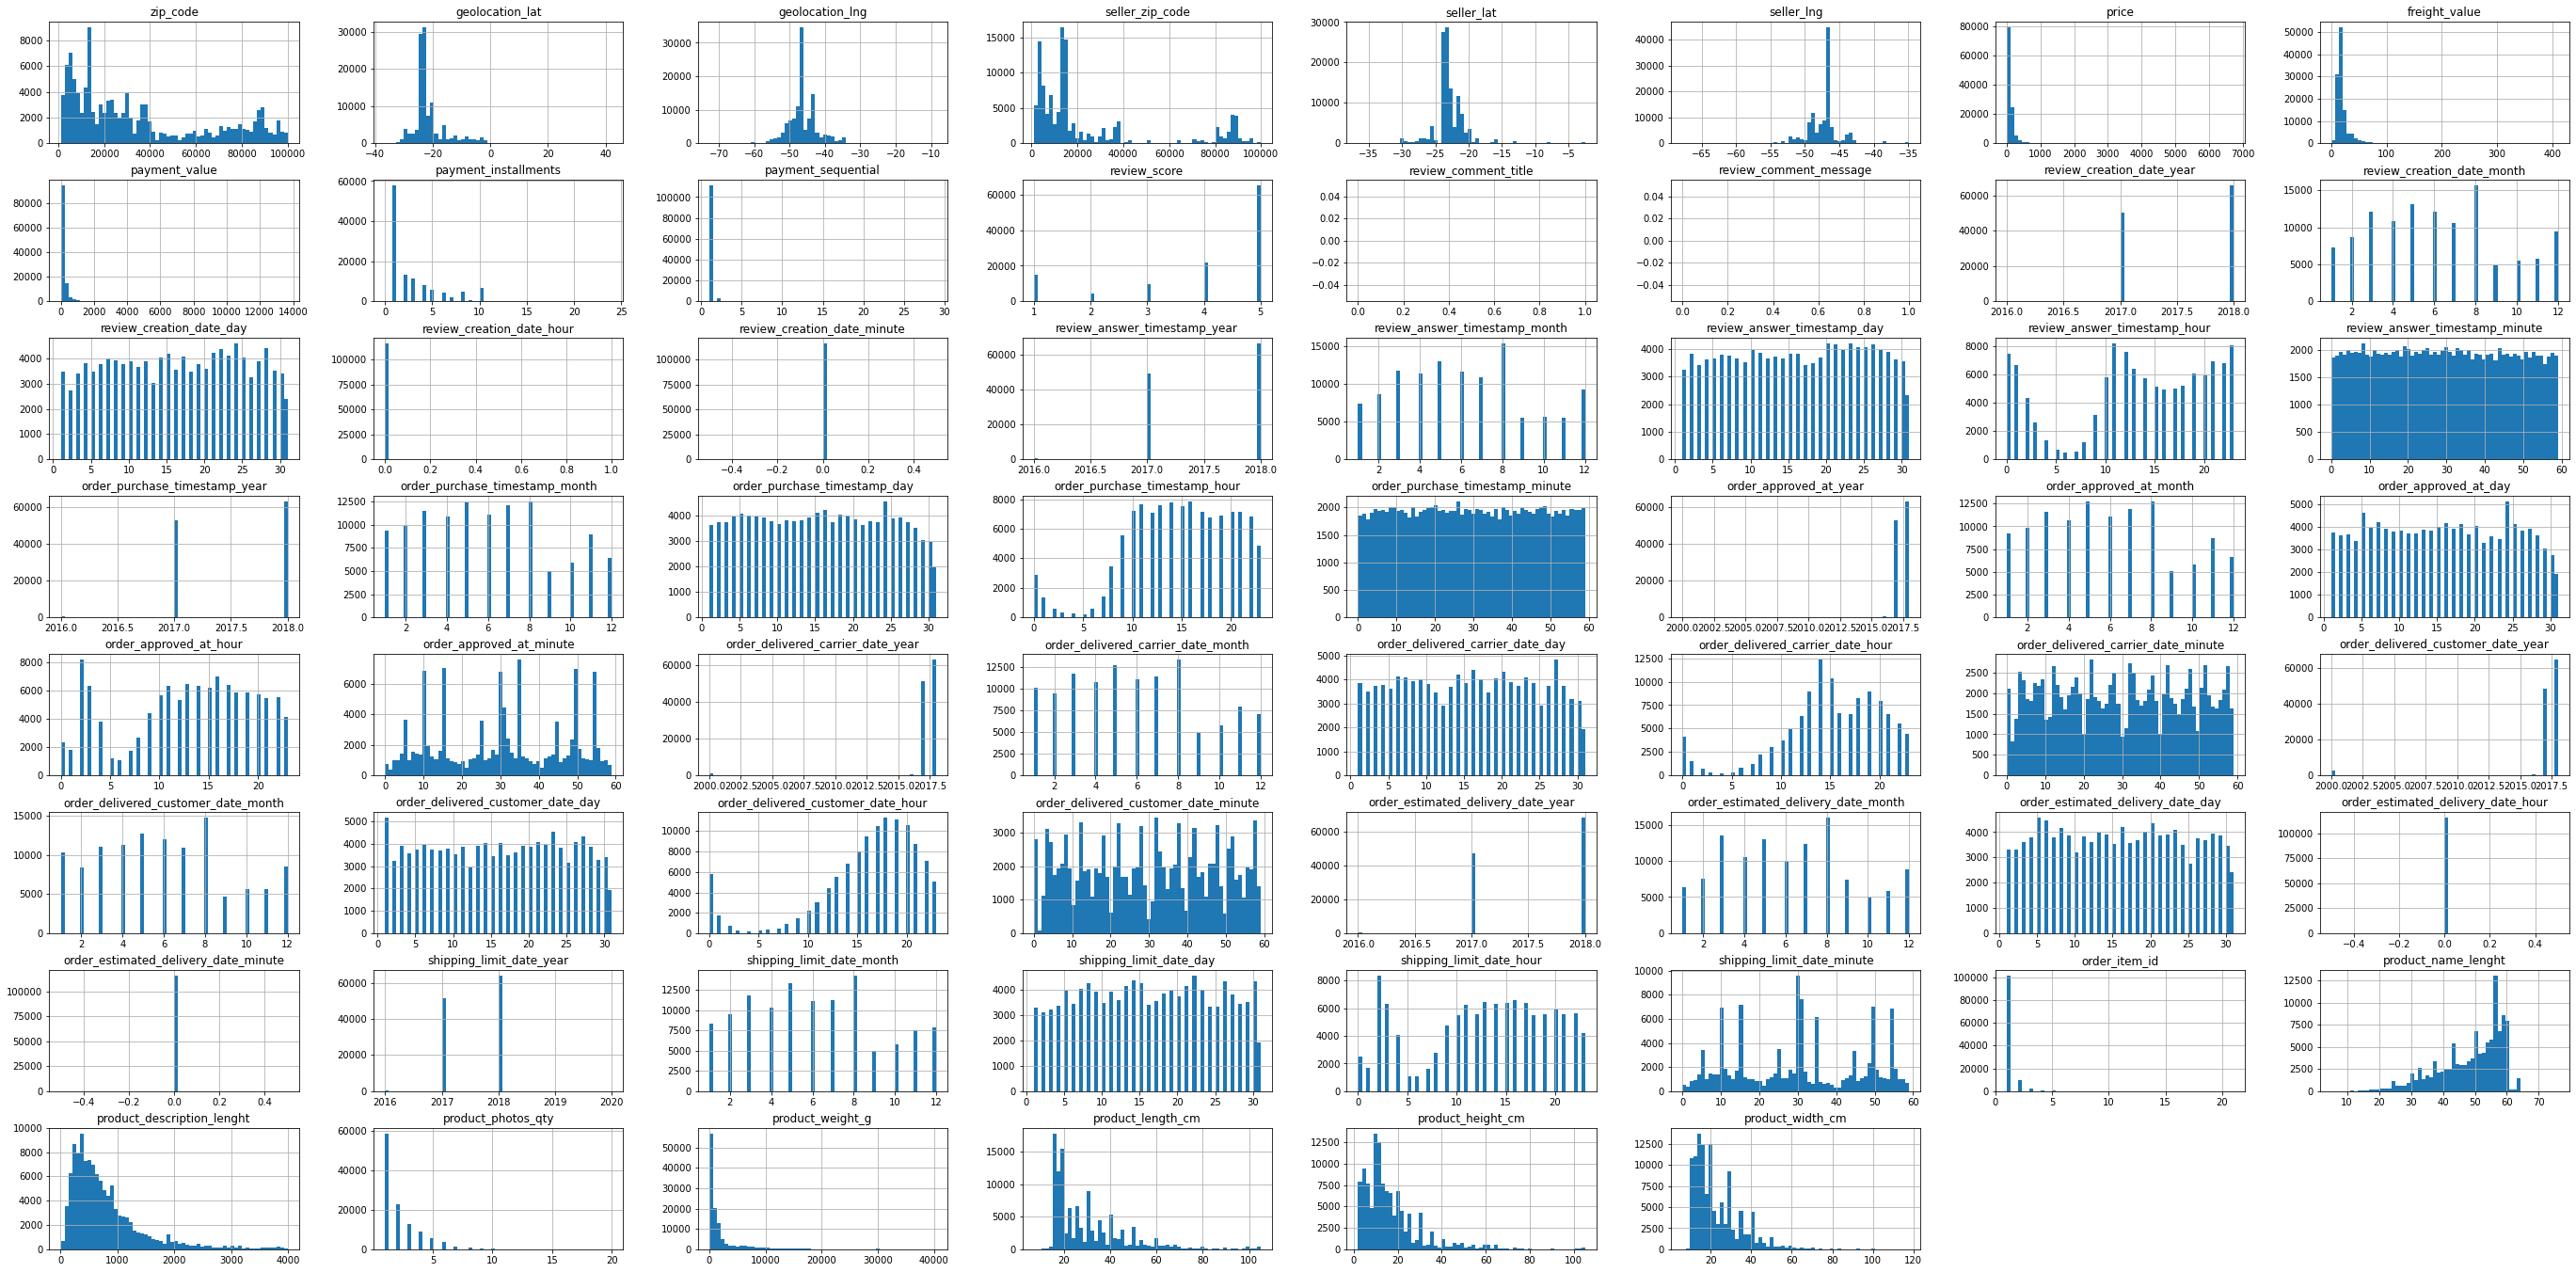

In [19]:
data_df.hist(figsize=(48,24), bins = 60)

In [20]:
data_df.to_csv('Ressources' + '/' + 'GlobalData.csv', index=False)

## Specific Dataset ##

We will now make a smaller Dataset containing new features usualy used to segment customers in marketing.

### Creation ###

We will first make the index of our new dataset and define some function and usefull variables for the creation of new features.

In [3]:
data_df = pd.read_csv('Ressources' + '/' + 'Data.csv')

In [4]:
segmented_data_df = pd.DataFrame()
segmented_data_df['customer_id'] = data_df['customer_unique_id']
segmented_data_df.drop_duplicates(inplace=True, ignore_index=True)

In [6]:
shop_income = 0
for order in list(data_df['order_id'].unique()):
    order_masque = data_df[data_df['order_id']==order]
    shop_income += order_masque['payment_value'].unique()[0]
    
def most_frequent(List):
    return max(set(List), key = List.count)

def check_trimester(time_list):
    last_order_time = max(order_time_list)
    if last_order_time < 201610:
        return '3rd Trimester of 2016'
    elif last_order_time < 201701:
        return '4th Trimester of 2016'
    elif last_order_time < 201704:
        return '1st Trimester of 2017'
    elif last_order_time < 201707:
        return '2nd Trimester of 2017'
    elif last_order_time < 201710:
        return '3rd Trimester of 2017'
    elif last_order_time < 201801:
        return '4th Trimester of 2017'
    elif last_order_time < 201804:
        return '1st Trimester of 2018'
    elif last_order_time < 201807:
        return '2nd Trimester of 2018'
    elif last_order_time < 201810:
        return '3rd Trimester of 2018'
    elif last_order_time < 201901 :
        return '4th Trimester of 2018'
    else:
        return 'Before Late 2016'  

In [13]:
df_index = 0
for customer in data_df['customer_unique_id']:
    customer_masque = data_df[data_df['customer_unique_id'] == customer]
    total_payment = 0
    payment_type = []
    review_score = []
    days_list = []
    hours_list = []
    distance_list = []
    volume_list = []
    order_time_list =[]
    
    for order in list(customer_masque['order_id'].unique()):
        order_masque = customer_masque[customer_masque['order_id']==order]
        total_payment += order_masque['payment_value'].unique()[0]
        review_score.append(order_masque['review_score'].unique()[0])
        days_list.append(order_masque['order_purchase_timestamp_weekday_name'].unique()[0])
        hours_list.append(order_masque['order_purchase_timestamp_hour'].unique()[0])
        payment_type.append(order_masque['payment_type'].unique()[0])
        lat_dif = (order_masque['geolocation_lat'].unique()[0] - order_masque['seller_lat'].unique()[0])
        lng_dif = (order_masque['geolocation_lng'].unique()[0] - order_masque['seller_lng'].unique()[0])
        distance = np.square(lat_dif**2 + lng_dif**2)
        distance_list.append(distance)
        order_year = order_masque['order_purchase_timestamp_year'].unique()[0]
        order_month = order_masque['order_purchase_timestamp_month'].unique()[0]
        order_time = order_year * 100 + order_month
        order_time_list.append(order_time)
        
    for i, j in customer_masque.iterrows():
        lenght = customer_masque.loc[i, 'product_length_cm']
        height = customer_masque.loc[i, 'product_height_cm']
        width = customer_masque.loc[i, 'product_width_cm']
        volume = lenght * height * width
        volume_list.append(volume)
    
    segmented_data_df.loc[df_index, 'customer_city'] = customer_masque['customer_city'].unique()[0]
    segmented_data_df.loc[df_index, 'last_purchase_trimester'] = check_trimester(order_time_list)
    segmented_data_df.loc[df_index, 'usual_weekday_of_purchase'] = most_frequent(days_list)
    segmented_data_df.loc[df_index, 'usual_hour_of_purchase'] = most_frequent(hours_list)
    segmented_data_df.loc[df_index, 'usual_payment_type'] = most_frequent(payment_type)
    segmented_data_df.loc[df_index, 'average_distance_from_sellers'] = np.mean(distance_list)
    segmented_data_df.loc[df_index, 'average_freight_value'] = np.mean(customer_masque['freight_value'])
    segmented_data_df.loc[df_index, 'average_review_score'] = np.mean(review_score)
    segmented_data_df.loc[df_index, 'average_volume_of_product'] = np.mean(volume_list)
    segmented_data_df.loc[df_index, 'average_weight_of_product'] = np.mean(volume_list)
    segmented_data_df.loc[df_index, 'orders_number'] = customer_masque['order_id'].nunique()
    segmented_data_df.loc[df_index, 'products_number'] = len(customer_masque)
    segmented_data_df.loc[df_index, 'total_payment'] = total_payment
    segmented_data_df.loc[df_index, 'percent_of_shop_income'] = total_payment/shop_income*100
    
    df_index +=1

In [14]:
segmented_data_df.to_csv('Ressources' + '/' + 'SegmentedData.csv', index=False)

In [15]:
segmented_data_df

,customer_id,customer_city,last_purchase_trimester,usual_weekday_of_purchase,usual_hour_of_purchase,usual_payment_type,average_distance_from_sellers,average_freight_value,average_review_score,average_volume_of_product,average_weight_of_product,orders_number,products_number,total_payment,percent_of_shop_income
0,861eff4711a542e4b93843c6dd7febb0,franca,2nd Trimester of 2017,Tuesday,15.0,credit_card,97.701322,21.88,4.0,107136.0,107136.0,1.0,1.0,146.87,0.000960
1,452fab1c62b178922fc011b0eb89c1b9,barreiras,1st Trimester of 2018,Thursday,16.0,boleto,17003.024730,43.26,4.0,107136.0,107136.0,1.0,2.0,340.50,0.002225
2,613259d64ba972e49dc25b019b7918c3,barreiras,1st Trimester of 2018,Thursday,16.0,boleto,17003.024730,43.26,4.0,107136.0,107136.0,1.0,2.0,340.50,0.002225
3,aaad33c5051196b5e73c7d65b9072e1d,barueri,4th Trimester of 2017,Thursday,16.0,credit_card,0.062687,18.51,4.0,107136.0,107136.0,1.0,1.0,131.50,0.000859
4,35c0fa6f2e6bbb3576e725d22e1066b8,alfenas,1st Trimester of 2018,Tuesday,20.0,voucher,20.209350,57.08,3.0,107136.0,107136.0,1.0,2.0,100.00,0.000653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116002,NaN,sao paulo,2nd Trimester of 2018,Sunday,22.0,credit_card,0.000406,7.49,5.0,12000.0,12000.0,1.0,1.0,97.48,0.000637
116003,NaN,macaubas,3rd Trimester of 2017,Saturday,18.0,boleto,15995.548088,17.07,5.0,12000.0,12000.0,1.0,1.0,107.06,0.000699
116004,NaN,nova iguacu,2nd Trimester of 2017,Wednesday,17.0,credit_card,127.817277,14.52,5.0,9360.0,9360.0,1.0,1.0,124.52,0.000814
116005,NaN,sao paulo,2nd Trimester of 2017,Thursday,16.0,credit_card,0.000024,8.96,5.0,9360.0,9360.0,1.0,1.0,118.96,0.000777


In [16]:
segmented_data_df.nunique()

customer_id                      93628
customer_city                     4046
last_purchase_trimester              9
usual_weekday_of_purchase            7
usual_hour_of_purchase              24
usual_payment_type                   4
average_distance_from_sellers    89086
average_freight_value             8823
average_review_score                26
average_volume_of_product         7288
average_weight_of_product         7288
orders_number                        9
products_number                     27
total_payment                    28549
percent_of_shop_income           28499
dtype: int64

In [17]:
segmented_data_df = pd.read_csv('Ressources' + '/' + 'SegmentedData.csv')

In [18]:
segmented_data_df.columns

Index(['customer_id', 'customer_city', 'last_purchase_trimester',
       'usual_weekday_of_purchase', 'usual_hour_of_purchase',
       'usual_payment_type', 'average_distance_from_sellers',
       'average_freight_value', 'average_review_score',
       'average_volume_of_product', 'average_weight_of_product',
       'orders_number', 'products_number', 'total_payment',
       'percent_of_shop_income'],
      dtype='object')